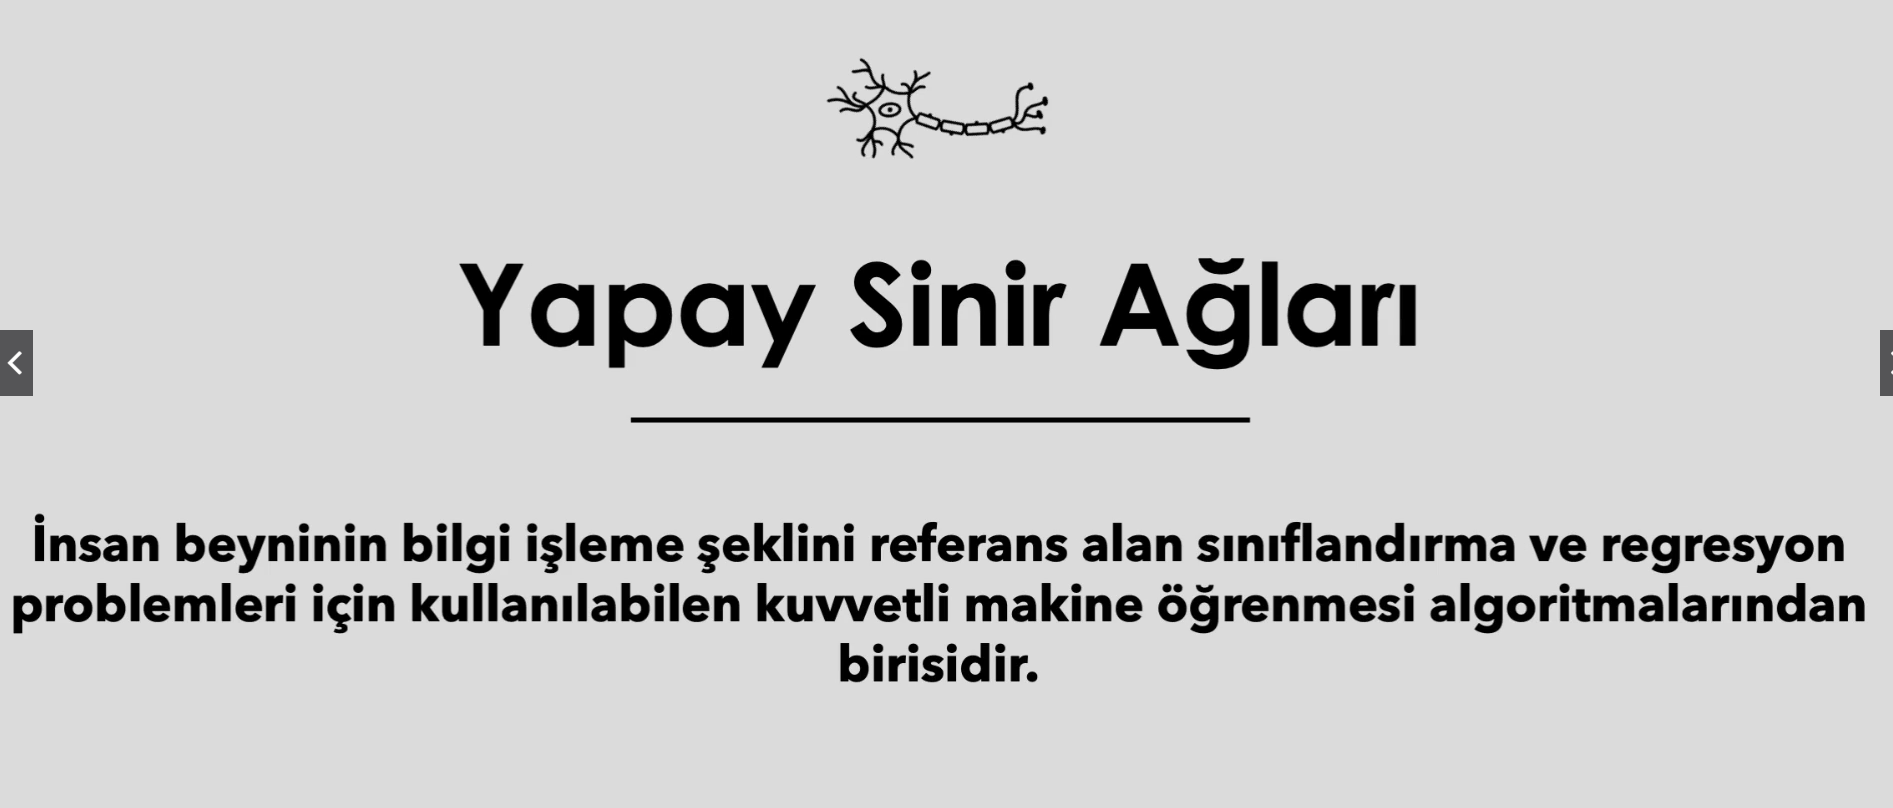

## Yapay Sinir Ağları

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
y= df["Outcome"]
X= df.drop(['Outcome'], axis=1) 

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size=0.30, random_state=42)

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
scaler = StandardScaler()
scaler.fit(X_Train)
X_Train_Scaled = scaler.transform(X_Train)
X_Test_Scaled = scaler.transform(X_Test)

In [5]:
#X_Test_Scaled[0:5]

In [6]:
from sklearn.neural_network import MLPClassifier

In [7]:
mlpc = MLPClassifier().fit(X_Train_Scaled, Y_Train)

In [8]:
mlpc.coefs_

[array([[-3.67327931e-01,  7.93257702e-02,  2.90866332e-01,
          1.69454019e-01, -3.98698271e-01, -3.12623287e-01,
         -1.01334042e-01,  6.68469939e-02, -9.67700475e-03,
         -1.27894991e-01,  4.85516697e-02,  1.91232522e-01,
          3.23833359e-02, -1.92491547e-01,  2.99375163e-01,
          3.40583499e-01,  9.93766045e-03,  7.60856621e-02,
         -2.25409234e-01,  1.77683513e-02,  5.91939276e-02,
          1.28565362e-01,  1.58282529e-01, -1.95180744e-02,
         -2.49501004e-01,  1.28698705e-01,  1.31238255e-01,
         -5.46517175e-02,  2.24015698e-01, -1.51066833e-01,
         -3.91817581e-01, -9.93241513e-02, -2.35027245e-02,
         -7.48824810e-02, -8.78779151e-02, -1.12343164e-01,
         -1.46716521e-01,  8.82319661e-02,  1.25852114e-02,
         -6.14748738e-02, -2.49623999e-01, -8.92099829e-02,
          1.25894583e-01, -1.38641580e-02,  1.11692475e-01,
         -1.68277360e-01, -2.34245546e-01,  1.15481321e-01,
         -6.21710556e-02, -2.28887172e-0

In [22]:
dir(mlpc)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_backprop',
 '_check_n_features',
 '_compute_loss_grad',
 '_estimator_type',
 '_fit',
 '_fit_lbfgs',
 '_fit_stochastic',
 '_forward_pass',
 '_forward_pass_fast',
 '_get_param_names',
 '_get_tags',
 '_init_coef',
 '_initialize',
 '_label_binarizer',
 '_loss_grad_lbfgs',
 '_more_tags',
 '_no_improvement_count',
 '_optimizer',
 '_partial_fit',
 '_random_state',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_unpack',
 '_update_no_improvement_count',
 '_validate_data',
 '_validate_hyperparameters',
 '_validate_input',
 'activation',
 'alpha

### Tahmin

In [9]:
y_pred = mlpc.predict(X_Test_Scaled)
accuracy_score(Y_Test, y_pred)

0.7272727272727273

### Model Tuning

In [10]:
mlpc.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [ ]:
#?mlpc

In [11]:
mlpc_params = {"alpha" : [0.1, 0.01, 0.02, 0.005, 0.0001, 0.00001],
              "hidden_layer_sizes" : [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5),
                                     (5,3)], 
              "solver" : ["lbfgs", "adam", "sgd"],
              "activation" : ["relu", "logistic"]}

In [29]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params,
                            cv=10,
                            n_jobs=-1,
                            verbose=2)
mlpc_cv_model.fit(X_Train_Scaled, Y_Train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [ ]:
print("En iyi parametreler:", str(mlpc_cv_model.best_params_))

In [14]:
mlpc_tuned = MLPClassifier(activation="logistic",
                           alpha=0.1,
                           hidden_layer_sizes=(100,100,100),
                           solver="adam")

mlpc_tuned.fit(X_Train_Scaled, Y_Train)

MLPClassifier(activation='logistic', alpha=0.1,
              hidden_layer_sizes=(100, 100, 100))

In [16]:
y_pred = mlpc_tuned.predict(X_Test_Scaled)
accuracy_score(Y_Test, y_pred)

0.7316017316017316